In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

station_data = pd.read_csv('../../modified_record/m_station_data.csv', usecols=['started_at','ended_at','start_station_name','start_lat','start_lng','end_station_name','end_lat','end_lng','start_id','end_id'])
station_data.head()

,started_at,ended_at,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,start_id,end_id
0,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,Central Park West & W 76 St,40.778968,-73.973747,W 89 St & Columbus Ave,40.788221,-73.970416,2494.0,1669.0
1,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,1.0,3133.0
2,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,40.785247,-73.976673,E 77 St & 3 Ave,40.773142,-73.958562,2263.0,2285.0
3,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,W 15 St & 6 Ave,40.738046,-73.996430,1803.0,1932.0
4,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,1634.0,1940.0


In [2]:
station_data['started_at'] = pd.to_datetime(station_data['started_at'], format='%Y-%m-%d %H:%M:%S')
station_data['ended_at'] = pd.to_datetime(station_data['ended_at'], format='%Y-%m-%d %H:%M:%S')
station_data.head()

,started_at,ended_at,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,start_id,end_id
0,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,Central Park West & W 76 St,40.778968,-73.973747,W 89 St & Columbus Ave,40.788221,-73.970416,2494.0,1669.0
1,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,1.0,3133.0
2,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,40.785247,-73.976673,E 77 St & 3 Ave,40.773142,-73.958562,2263.0,2285.0
3,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,W 15 St & 6 Ave,40.738046,-73.996430,1803.0,1932.0
4,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,1634.0,1940.0


In [4]:
# left vertex
ORIGIN = (40.7062855, -74.0315102)
# top vertex on y axis
Y_AXIS = (40.7738362, -73.9985950)
# bottom vertex on x axis
X_AXIS = (40.6937655, -73.9871323)
# right vertex
PLOY_VTX = (40.7613036, -73.9541783)

# norm axis vertex
def normalize_vertex(vertex):
    lat, lng = vertex[0]-ORIGIN[0], vertex[1]-ORIGIN[1]
    n_vertex = np.array((lat, lng))

    # transform vertex
    n_vertex = n_vertex / np.linalg.norm(n_vertex)
    return n_vertex

N_Y_AXIS = normalize_vertex(Y_AXIS)
N_X_AXIS = normalize_vertex(X_AXIS)

# norm & transform polygon vertex
N_PLOY = np.array((PLOY_VTX[0]-ORIGIN[0], PLOY_VTX[1]-ORIGIN[1]))
T_PLOY = (np.dot(N_PLOY, N_Y_AXIS), np.dot(N_PLOY, N_X_AXIS))

In [5]:
print(N_X_AXIS)
print(N_Y_AXIS)
print(T_PLOY)

[-0.27152357  0.96243179]
[0.89895903 0.43803271]
(0.08333291989008021, 0.0594879677517408)


In [6]:
# process location data

# ['started_at','ended_at','start_station_name','start_lat','start_lng',
# 'end_station_name','end_lat','end_lng','start_id','end_id']

# norm location
station_data['norm_start_lat'] = station_data['start_lat']-ORIGIN[0]
station_data['norm_start_lng'] = station_data['start_lng']-ORIGIN[1]
station_data['norm_end_lat'] = station_data['end_lat']-ORIGIN[0]
station_data['norm_end_lng'] = station_data['end_lng']-ORIGIN[1]

# transform location
station_data['start_x'] = station_data['norm_start_lat'] * N_Y_AXIS[0] + station_data['norm_start_lng'] * N_Y_AXIS[1]
station_data['start_y'] = station_data['norm_start_lat'] * N_X_AXIS[0] + station_data['norm_start_lng'] * N_X_AXIS[1]
station_data['end_x'] = station_data['norm_end_lat'] * N_Y_AXIS[0] + station_data['norm_end_lng'] * N_Y_AXIS[1]
station_data['end_y'] = station_data['norm_end_lat'] * N_X_AXIS[0] + station_data['norm_end_lng'] * N_X_AXIS[1]


In [7]:
station_data.head()

,started_at,ended_at,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,start_id,end_id,norm_start_lat,norm_start_lng,norm_end_lat,norm_end_lng,start_x,start_y,end_x,end_y
0,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,Central Park West & W 76 St,40.778968,-73.973747,W 89 St & Columbus Ave,40.788221,-73.970416,2494.0,1669.0,0.072682,0.057763,0.081936,0.061095,0.090640,0.035858,0.100418,0.036552
1,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,1.0,3133.0,0.045588,0.053804,0.041518,0.058068,0.064549,0.039405,0.062759,0.044614
2,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,40.785247,-73.976673,E 77 St & 3 Ave,40.773142,-73.958562,2263.0,2285.0,0.078961,0.054837,0.066857,0.072949,0.095003,0.031337,0.092055,0.052055
3,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,W 15 St & 6 Ave,40.738046,-73.996430,1803.0,1932.0,0.025933,0.049855,0.031761,0.035081,0.045151,0.040940,0.043918,0.025139
4,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,1634.0,1940.0,0.021149,0.037720,0.031989,0.043991,0.035534,0.030561,0.048026,0.033652


In [8]:
# grid partition

X_SIZE = 8
Y_SIZE = 16

station_data['start_x_index'] = station_data['start_x'] * X_SIZE // T_PLOY[0]
station_data['start_y_index'] = station_data['start_y'] * Y_SIZE // T_PLOY[1]
station_data['end_x_index'] = station_data['end_x'] * X_SIZE // T_PLOY[0]
station_data['end_y_index'] = station_data['end_y'] * Y_SIZE // T_PLOY[1]


In [9]:
station_data.drop(['norm_start_lat', 'norm_start_lng', 'norm_end_lat', 'norm_end_lng', 'start_x', 'start_y', 'end_x', 'end_y'], axis=1, inplace = True)
station_data.head()

,started_at,ended_at,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,start_id,end_id,start_x_index,start_y_index,end_x_index,end_y_index
0,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,Central Park West & W 76 St,40.778968,-73.973747,W 89 St & Columbus Ave,40.788221,-73.970416,2494.0,1669.0,8.0,9.0,9.0,9.0
1,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,1.0,3133.0,6.0,10.0,6.0,11.0
2,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,Amsterdam Ave & W 82 St,40.785247,-73.976673,E 77 St & 3 Ave,40.773142,-73.958562,2263.0,2285.0,9.0,8.0,8.0,14.0
3,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,W 15 St & 6 Ave,40.738046,-73.996430,1803.0,1932.0,4.0,11.0,4.0,6.0
4,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,1634.0,1940.0,3.0,8.0,4.0,9.0


In [10]:
# filter
station_data = station_data[(station_data['start_x_index'] >= 0) & (station_data['start_x_index'] < X_SIZE)]
station_data = station_data[(station_data['start_y_index'] >= 0) & (station_data['start_y_index'] < Y_SIZE)]
station_data = station_data[(station_data['end_x_index'] >= 0) & (station_data['end_x_index'] < X_SIZE)]
station_data = station_data[(station_data['end_y_index'] >= 0) & (station_data['end_y_index'] < Y_SIZE)]

station_data.reset_index(inplace=True, drop=True)

In [11]:
station_data.head()

,started_at,ended_at,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,start_id,end_id,start_x_index,start_y_index,end_x_index,end_y_index
0,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,E 39 St & 2 Ave,40.747804,-73.973442,1.0,3133.0,6.0,10.0,6.0,11.0
1,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,W 15 St & 6 Ave,40.738046,-73.996430,1803.0,1932.0,4.0,11.0,4.0,6.0
2,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,E 20 St & Park Ave,40.738274,-73.987520,1634.0,1940.0,3.0,8.0,4.0,9.0
3,2019-01-01 00:12:19.603,2019-01-01 00:14:23.104,E 7 St & Avenue A,40.726218,-73.983799,E 2 St & Avenue A,40.723077,-73.985836,2230.0,2019.0,3.0,10.0,3.0,10.0
4,2019-01-01 00:14:02.797,2019-01-01 00:29:35.045,W 31 St & 7 Ave,40.749156,-73.991600,Sullivan St & Washington Sq,40.730477,-73.999061,972.0,2685.0,5.0,7.0,3.0,6.0


In [12]:
print(station_data.shape)
print(station_data.dtypes)

(32102409, 14)
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_lat                    float64
start_lng                    float64
end_station_name              object
end_lat                      float64
end_lng                      float64
start_id                     float64
end_id                       float64
start_x_index                float64
start_y_index                float64
end_x_index                  float64
end_y_index                  float64
dtype: object


In [17]:
station_data['start_x_index'] = station_data['start_x_index'].astype('int')
station_data['start_y_index'] = station_data['start_y_index'].astype('int')
station_data['end_x_index'] = station_data['end_x_index'].astype('int')
station_data['end_y_index'] = station_data['end_y_index'].astype('int')

In [18]:
print(station_data.shape)
print(station_data.dtypes)

(32102409, 14)
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_lat                    float64
start_lng                    float64
end_station_name              object
end_lat                      float64
end_lng                      float64
start_id                     float64
end_id                       float64
start_x_index                  int32
start_y_index                  int32
end_x_index                    int32
end_y_index                    int32
dtype: object


In [19]:
import datetime as d
import calendar as c
from datetime import timedelta

delta_incres = 60
current_time = d.datetime(2019, 1, 1)
end_time = d.datetime(2021, 9, 1)

result_station = []
while current_time <= end_time:
    day_num = c.monthrange(current_time.year, current_time.month)[1]
    result_station.append(np.zeros([(1440 // delta_incres * day_num), X_SIZE, Y_SIZE, 2], dtype=int))
    current_time += timedelta(days=day_num)

In [21]:
for i in range(station_data.shape[0]):
    start_id = station_data.loc[i, 'start_id']
    end_id = station_data.loc[i, 'end_id']

    if (not np.isnan(start_id)) and (not np.isnan(end_id)):
        started_at = station_data.loc[i, 'started_at']
        s_0 = (started_at.year-2019)*12 + (started_at.month-1)
        s_1 = ((started_at.day-1)*24*60 + (started_at.hour)*60 + (started_at.minute)) // delta_incres
        s_2 = station_data.loc[i, 'start_x_index']
        s_3 = station_data.loc[i, 'start_y_index']
        result_station[s_0][s_1][s_2][s_3][0] += 1
    
        ended_at = station_data.loc[i, 'ended_at']
        e_0 = (ended_at.year-2019)*12 + (ended_at.month-1)
        e_1 = ((ended_at.day-1)*24*60 + (ended_at.hour)*60 + (ended_at.minute)) // delta_incres
        e_2 = station_data.loc[i, 'end_x_index']
        e_3 = station_data.loc[i, 'end_y_index']        
        result_station[e_0][e_1][e_2][e_3][1] += 1

In [23]:
current_time = d.datetime(2019, 1, 1)
end_time = d.datetime(2021, 9, 1)

i = 0
while current_time <= end_time:
    day_num = c.monthrange(current_time.year, current_time.month)[1]
    np.save(('../../processed_data/{}{:02d}_grid.npy'.format(current_time.year, current_time.month)), result_station[i])
    current_time += timedelta(days=day_num)
    i += 1

In [24]:
station_data.to_csv('./grid_data.csv')

In [12]:
grid_outflow = pd.DataFrame(station_data[['start_x_index', 'start_y_index']].groupby(['start_x_index', 'start_y_index'], as_index=False).size())
grid_outflow

,start_x_index,start_y_index,size
0,0.0,3.0,253612
1,0.0,4.0,159221
2,0.0,5.0,228350
3,0.0,6.0,236612
4,0.0,9.0,72552
...,...,...,...
85,7.0,11.0,212603
86,7.0,12.0,228347
87,7.0,13.0,185303
88,7.0,14.0,117554


In [24]:
X_UNIT = ((X_AXIS[0]-ORIGIN[0]) / X_SIZE, (X_AXIS[1]-ORIGIN[1]) / X_SIZE)
Y_UNIT = ((Y_AXIS[0]-ORIGIN[0]) / Y_SIZE, (Y_AXIS[1]-ORIGIN[1]) / Y_SIZE)

x = station_data['start_lat']
y = station_data['start_lng']

In [25]:
print(X_UNIT)
print(Y_UNIT)

(-0.0015650000000002606, 0.0055472375000000795)
(0.004221918749999887, 0.0020572000000003143)


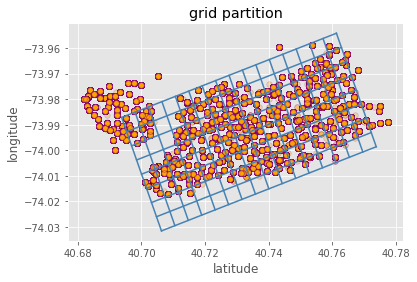

In [36]:
plt.style.use('ggplot')

plt.scatter(x, y, color='orange',edgecolors='purple', s=30, alpha=0.3)

for i in range(X_SIZE+1):
    plt.plot([ORIGIN[0]+X_UNIT[0]*i, Y_AXIS[0]+X_UNIT[0]*i], [ORIGIN[1]+X_UNIT[1]*i, Y_AXIS[1]+X_UNIT[1]*i], color='steelblue')

for i in range(Y_SIZE+1):
    plt.plot([ORIGIN[0]+Y_UNIT[0]*i, X_AXIS[0]+Y_UNIT[0]*i], [ORIGIN[1]+Y_UNIT[1]*i, X_AXIS[1]+Y_UNIT[1]*i], color='steelblue')

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('grid partition')
plt.show()